# Youtube Trending Videos Analysis  
## Dataset from [Kaggle](https://www.kaggle.com/datasets/datasnaek/youtube-new?resource=download)

### Context

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.

Note that this dataset is a structurally improved version of [this dataset](https://www.kaggle.com/datasnaek/youtube).
### Content

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.

## Importation of Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the dataset

df = pd.read_csv("USvideos.csv")

## First Inspection of Dataset

### Dataset Shape

In [3]:
# size of dataset

df.shape

(40949, 16)

### Check dtypes

In [4]:
# check datatypes of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
# columns

df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### Check missing values

In [6]:
# missing values count

df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

## Data Cleaning

### Removal of unseful variables
I don't think I will use the thumbnail_link column

In [7]:
# drop unuseful columns from the dataframe

df.drop(columns=["thumbnail_link"], inplace=True)

### Convert Date Variables to Datetime dtype

In [8]:
df["trending_date"].sample(10).values

array(['18.07.04', '18.27.02', '18.13.05', '18.29.03', '17.18.12',
       '18.17.05', '18.07.01', '17.13.12', '18.13.02', '17.27.12'],
      dtype=object)

In [9]:
df["publish_time"].sample(10).values

array(['2018-01-12T20:16:33.000Z', '2018-05-25T16:50:01.000Z',
       '2018-05-29T17:00:00.000Z', '2018-05-04T21:00:00.000Z',
       '2018-01-05T05:39:51.000Z', '2018-04-06T17:00:05.000Z',
       '2018-05-29T21:00:01.000Z', '2018-04-30T16:00:23.000Z',
       '2018-05-21T14:12:22.000Z', '2017-12-20T17:01:03.000Z'],
      dtype=object)

The trending_date are in the YY.DD.MM format.

In [10]:
# convert trending date and publish_time column to datetime datatype

df["trending_date"] = pd.to_datetime(df["trending_date"], format='%y.%d.%m')
df["publish_time"] = pd.to_datetime(df["publish_time"])

In [11]:
# check the dtypes again after conversion

df.dtypes

video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
dtype: object

### Clean the text variables

In [12]:
df.select_dtypes('object').columns

Index(['video_id', 'title', 'channel_title', 'tags', 'description'], dtype='object')

#### Titles
Change title to a proper case

In [13]:
df["title"].sample(10).values

array(['Potatoes - You Suck at Cooking (episode 74)',
       'Buying Used Things 2',
       'The Last Jedi Cast Touches Bearded Dragons & Other Weird Stuff | Fear Box | Vanity Fair',
       '10 Ridiculous Cooking Products!', 'Polar bear cub audio',
       "BEYONCE'S MAKEUP ARTIST DOES MY MAKEUP! | ft. Sir John",
       'Antonio Banderas Can Play Picasso, But Can He Draw Like Him?',
       'Just Like You Left It',
       'Made in Miami (Artist Spotlight Story) - Camila Cabello',
       'Demi Lovato, Unfiltered: A Pop Star Removes Her Makeup | Vogue'],
      dtype=object)

In [14]:
df["title"].str.strip().str.capitalize()

0                       We want to talk about our marriage
1        The trump presidency: last week tonight with j...
2        Racist superman | rudy mancuso, king bach & le...
3                         Nickelback lyrics: real or fake?
4                                 I dare you: going bald!?
                               ...                        
40944                         The cat who caught the laser
40945                           True facts : ant mutualism
40946    I gave safiya nygaard a perfect hair makeover ...
40947                  How black panther should have ended
40948    Official call of duty®: black ops 4 — multipla...
Name: title, Length: 40949, dtype: object

#### Category

In [15]:
df["category_id"].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

Translate category id into a string, using this github resource:  [dgp/youtube api video category id list](https://gist.github.com/dgp/1b24bf2961521bd75d6c)

In [16]:
categories = """
2 - Autos & Vehicles
1 - Film & Animation
10 - Music
15 - Pets & Animals
17 - Sports
18 - Short Movies
19 - Travel & Events
20 - Gaming
21 - Videoblogging
22 - People & Blogs
23 - Comedy
24 - Entertainment
25 - News & Politics
26 - Howto & Style
27 - Education
28 - Science & Technology
29 - Nonprofits & Activism
30 - Movies
31 - Anime/Animation
32 - Action/Adventure
33 - Classics
34 - Comedy
35 - Documentary
36 - Drama
37 - Family
38 - Foreign
39 - Horror
40 - Sci-Fi/Fantasy
41 - Thriller
42 - Shorts
43 - Shows
44 - Trailers"""

In [17]:
category_mapping = {}
for line in categories.strip().split("\n"):
    category_id, category_name = line.split(" - ")
    category_mapping[int(category_id)] = category_name

dict(list(category_mapping.items())[:5])

{2: 'Autos & Vehicles',
 1: 'Film & Animation',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports'}

In [18]:
df["category_id"].map(category_mapping)

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_id, Length: 40949, dtype: object

In [19]:
df["category"] = df["category_id"].map(category_mapping)

In [20]:
# take a sample to check the category_id matches with the category

df[["category_id", "category"]].sample(5)

,category_id,category
29744,26,Howto & Style
25890,15,Pets & Animals
1025,10,Music
15302,10,Music
30665,22,People & Blogs


#### Channel title

In [21]:
df["channel_title"].sample(10).values

array(['ESPN', 'ToniBraxtonVEVO', "What's Inside?", 'heyitsfeiii',
       'Jack and Dean', 'TED-Ed', 'Disney Parks', 'Tina Yong',
       'Hope For Paws - Official Rescue Channel', 'Bon Appétit'],
      dtype=object)

In [22]:
df["channel_title"].str.strip().str.capitalize()

0                    Caseyneistat
1                 Lastweektonight
2                    Rudy mancuso
3           Good mythical morning
4                        Nigahiga
                   ...           
40944               Aaronsanimals
40945                    Zefrank1
40946                  Brad mondo
40947    How it should have ended
40948                Call of duty
Name: channel_title, Length: 40949, dtype: object

#### Tags

In [23]:
df["tags"].sample(10)

16675                                               [none]
11594    bee movie|"jerry seinfeld"|"cinema sins"|"cine...
16407    HBO|"Westworld"|"Evan Rachel Wood"|"JJ Abrams"...
13564                           Inside the NBA|"Top Video"
306      iphone x|"iphonex makeup"|"iphonex test"|"new ...
39054    Ariana|"Grande"|"No"|"Tears"|"Left"|"To"|"Cry"...
28594    “Overwatch Seasonal Event| Overwatch Archives|...
25796    laptop|"best tablet"|"apple ipad pro"|"microso...
13199    nbc news|"nbc"|"news"|"news channel"|"news sta...
12304    Late Night|"Seth Meyers"|"James Franco"|"Addre...
Name: tags, dtype: object

From a previous run of the **df["tags"].sample()**,
I found out that some videos have tags as: **[none]**, I will substitute this with an empty string

In [24]:
df.loc[df["tags"] == "[none]", "tags"] = None

In [25]:
df.tags = df.tags.apply(lambda x : x.replace('"', '').split('|') if x is not None else x )

Next, I will trim the whitespaces for each of the tags.

In [26]:
df.tags = df.tags.apply(lambda x : [i.strip().lower() for i in x] if x is not None else x)

In [27]:
df["tags"].sample(10)

27606    [kylie minogue, kylie, new music, pop, girls a...
1358     [access hollywood, blake shelton and gwen stef...
37207    [welcome to the party, diplo, lil pump, french...
24445    [brutalmoose, hidden block, brutalfoods, food,...
30391    [avicii, avicii dies, avicii dead, avicii pass...
24974    [worlds biggest lighter, worlds best lighter, ...
16728    [nbc the voice, the voice 2018, watch the voic...
18607    [sean, paul, david, guetta, mad, love, island,...
35156               [bighit, 빅히트, 방탄소년단, bts, bangtan, 방탄]
36065    [the green makeup challenge, green makeup chal...
Name: tags, dtype: object

## Export the clean dataset

### Rearrange the Columns

In [28]:
# Rearrange columns 

df = df[['video_id', 'title', 'description', 
         'channel_title', 'category_id', 'category',
         'trending_date', 'publish_time', 
         'views', 'likes', 'dislikes', 'comment_count', 
         'tags', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed']]

### Take a Sample of Clean dataset

In [29]:
df.sample(5)

,video_id,title,description,channel_title,category_id,category,trending_date,publish_time,views,likes,dislikes,comment_count,tags,comments_disabled,ratings_disabled,video_error_or_removed
31423,MWbQdgjsvJI,MAKING A DRESS OUT OF TRASH BAGS!,LOL HI ANGELS! You always say I could make wea...,Amber Scholl,26,Howto & Style,2018-04-28,2018-04-22 15:21:24+00:00,1620561,104038,1902,7758,"[diy, trash, how to, dress, tutorial, easy, am...",False,False,False
12041,WI06POju7UQ,"Jimmy Kimmel monologue - Jan 11, 2018 | Trump ...",Jimmy Kimmel on Trump and Immigrants,Donald J. Trump Topic,22,People & Blogs,2018-01-15,2018-01-12 05:08:28+00:00,439893,2865,2951,2367,None,False,False,False
27062,wD5YzBDSXv8,Bearded Men Try Going Clean-Shaven,Who are you?!\n\nCheck out more awesome videos...,BuzzFeedBlue,22,People & Blogs,2018-03-31,2018-03-23 21:00:20+00:00,1032686,11956,1319,1852,"[buzzfeed, buzzfeedblue, buzzfeed blue, blue, ...",False,False,False
27122,qYNNT1WIhwM,Twins Audition for American Idol With Bruno Ma...,Teenage twins Julian & Milo Sposato audition t...,American Idol,24,Entertainment,2018-03-31,2018-03-19 01:37:40+00:00,1850545,29605,1602,1591,"[abc, americanidol, idol, american idol, ryan,...",False,False,False
3337,t4ZsyO1n-kA,Making The Grand Tour: James's Candidate for t...,"Jeremy Clarkson, Richard Hammond, and James Ma...",The Grand Tour,24,Entertainment,2017-11-30,2017-11-25 15:05:10+00:00,1039720,22394,282,1289,"[the grand tour, jeremy clarkson, james may, r...",False,False,False


### Sort the dataset by publish_time

In [30]:
df = df.sort_values('publish_time').reset_index(drop=True)

In [31]:
df.head()

,video_id,title,description,channel_title,category_id,category,trending_date,publish_time,views,likes,dislikes,comment_count,tags,comments_disabled,ratings_disabled,video_error_or_removed
0,MJO3FmmFuh4,Budweiser - Original Whazzup? ad,"Original Whazzup ad - however, there is a litt...",dannotv,24,Entertainment,2018-02-05,2006-07-23 08:24:11+00:00,258506,459,152,82,"[budweiser, bud, whazzup, ad]",False,False,False
1,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,Poor Meryl...she was really scaredxD,Livia Giustiniani,1,Film & Animation,2018-01-07,2008-04-05 18:22:40+00:00,50030,46,6,26,"[meryl, streep, kramer, vs, dustin, hoffman, c...",False,False,False
2,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,Poor Meryl...she was really scaredxD,Livia Giustiniani,1,Film & Animation,2018-01-08,2008-04-05 18:22:40+00:00,50117,46,6,26,"[meryl, streep, kramer, vs, dustin, hoffman, c...",False,False,False
3,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,Poor Meryl...she was really scaredxD,Livia Giustiniani,1,Film & Animation,2018-01-06,2008-04-05 18:22:40+00:00,49942,46,6,26,"[meryl, streep, kramer, vs, dustin, hoffman, c...",False,False,False
4,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,Poor Meryl...she was really scaredxD,Livia Giustiniani,1,Film & Animation,2018-01-09,2008-04-05 18:22:40+00:00,50168,46,6,26,"[meryl, streep, kramer, vs, dustin, hoffman, c...",False,False,False


### Export to csv

In [32]:
# export the cleaned dataset to csv

df.to_csv("clean_youtube_USvideos.csv", index=False)

## Data Analysis

1. What are the top 10 most viewed videos?
2. Is there a correlation between the number of likes and views?
3. How does the distribution of views vary across different categories?
4.  Are there any trends in the number of likes and dislikes over time?
5.  Which channels have the highest average views per video?
6.  What is the average number of days a video remains on the trending list?
7.  Is there a relationship between the number of comments and the number of views?
8.  Do videos with disabled comments or ratings tend to have more or fewer views?

### 1. What are the top 10 most viewed videos?

#### top 10 most viewed videos

In [160]:
df.sort_values('views', ascending=False)[:10][['video_id', 'title', 'channel_title', 'views']].reset_index(drop=True)

,video_id,title,channel_title,views
0,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,225211923
1,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,220490543
2,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,217750076
3,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,210338856
4,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,205643016
5,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,200820941
6,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,196222618
7,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,190950401
8,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,184446490
9,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,179045286


I noticed that some of the videos have multiple entries into the trending list, but I want a list of the top 10 videos.

In [48]:
# Group by video_id, then get the most viewed videos by "views"

top_videos = (df.groupby("video_id")
                 .apply(lambda x: x.nlargest(1, "views"))
                 .sort_values(by="views", ascending=False).reset_index(drop=True))

In [73]:
top_ten_videos = top_videos[["title", "channel_title", "views"]].iloc[:10]
top_ten_videos

,title,channel_title,views
0,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,225211923
1,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,149376127
2,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,148689896
3,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,139334502
4,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,123010920
5,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,122544931
6,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,102012605
7,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Cardi B,94254507
8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,91933007
9,Maluma - El Préstamo (Official Video),MalumaVEVO,87264467


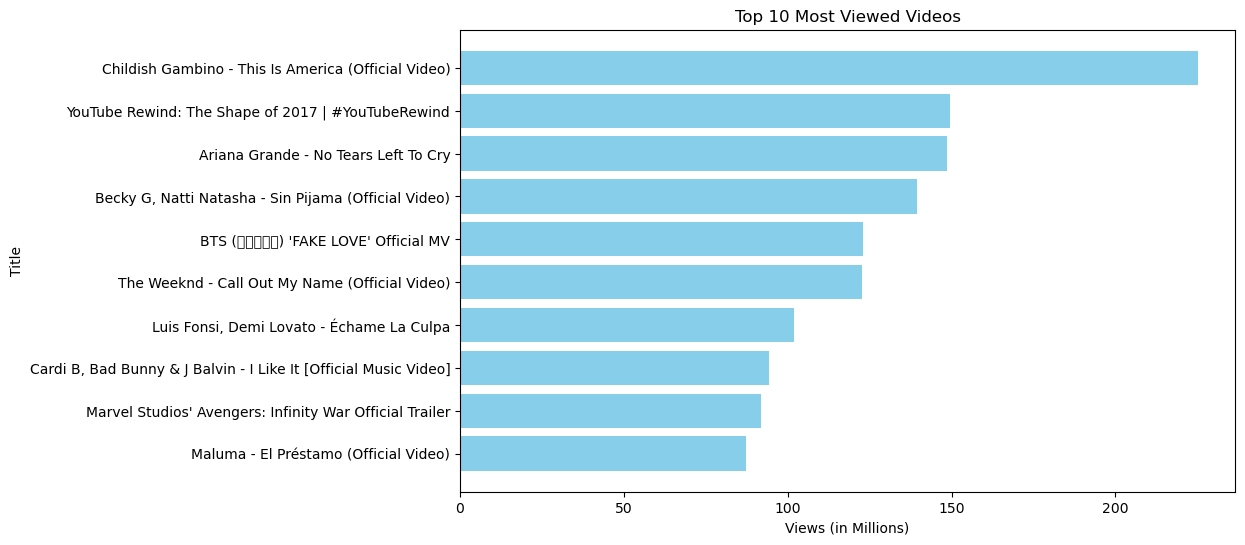

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(top_ten_videos["title"], top_ten_videos["views"] / 1000000, color="skyblue")
ax.set_xlabel('Views (in Millions)')
ax.set_ylabel('Title')
ax.set_title('Top 10 Most Viewed Videos')
ax.invert_yaxis()
plt.show()

### 2. Is there a correlation between the number of likes and views?

In [39]:
# correlation between number of likes and views

views_likes = df[["views", "likes"]]
views_likes

,views,likes
0,258506,459
1,50030,46
2,50117,46
3,49942,46
4,50168,46
...,...,...
40944,812832,7701
40945,1473589,214511
40946,296615,38671
40947,402418,10070


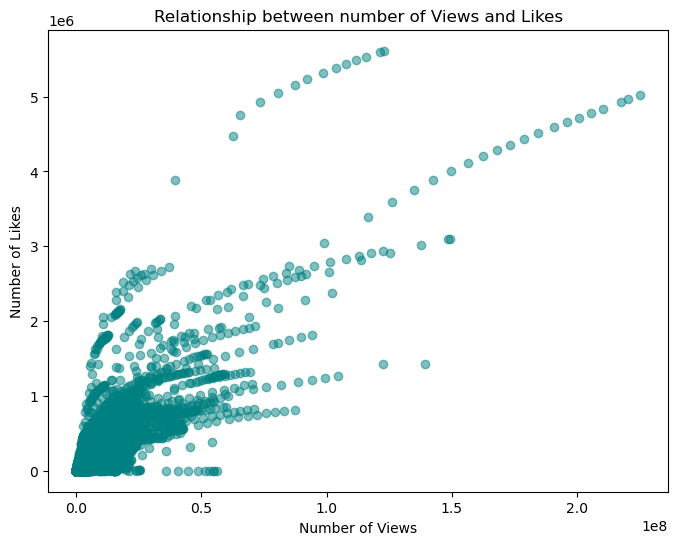

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(views_likes["views"], views_likes["likes"], alpha=0.5, color='teal')
ax.set_title("Relationship between number of Views and Likes")
ax.set_xlabel("Number of Views")
ax.set_ylabel("Number of Likes")
plt.show()

In [41]:
# Calculate the correlation coefficient
correlation = views_likes["likes"].corr(views_likes["views"])

# Print the correlation value
print(f"Correlation between likes and views: {correlation:.2f}")

Correlation between likes and views: 0.85


A correlation coefficient of 0.85 indicates a strong positive correlation between likes and views. This means that as the number of likes increases, the number of views also tends to increase, and vice versa. In other words, videos with more likes tend to have more views, and videos with fewer likes tend to have fewer views.

### 3. How does the distribution of views vary across different categories?

In [63]:
# distribution of views accross categories

data = df.groupby("category").views.count().sort_values(ascending=False)
data

category
Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: views, dtype: int64

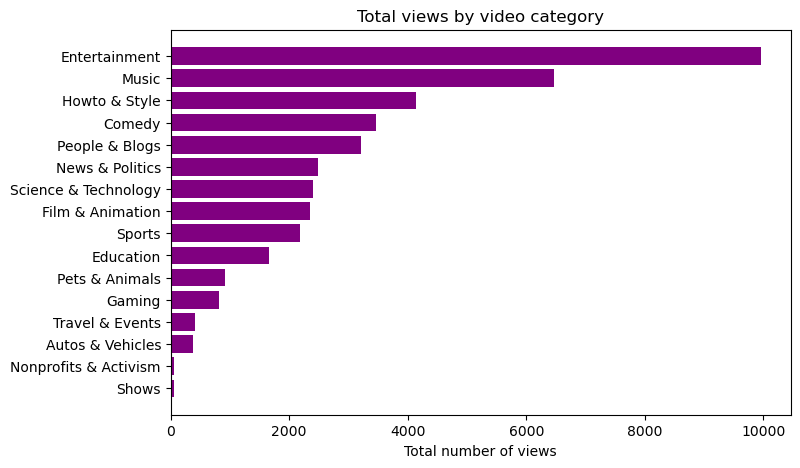

In [65]:
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(data.index, data.values, color="purple")
ax.invert_yaxis()
ax.set_xlabel('Total number of views')
ax.set_title('Total views by video category')
plt.show()

### 4. Are there any trends in the number of likes and dislikes over time?

In [126]:
likes_trend = df[["trending_date", "likes", "dislikes"]]

In [128]:
likes_trend.loc[:, "date"] = likes_trend["trending_date"].dt.strftime("%m-%Y")

C:\Users\Dell\AppData\Local\Temp\ipykernel_7184\1178574289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likes_trend.loc[:, "date"] = likes_trend["trending_date"].dt.strftime("%m-%Y")


In [131]:
data = likes_trend.groupby("date")[["likes", "dislikes"]].sum()
data

,likes,dislikes
date,,
01-2018,251882440,22243761
02-2018,217896307,10478352
03-2018,402809262,14429156
04-2018,442508556,16760897
05-2018,828146533,36880602
06-2018,441504651,22170121
11-2017,159032378,5412376
12-2017,297367071,23602890


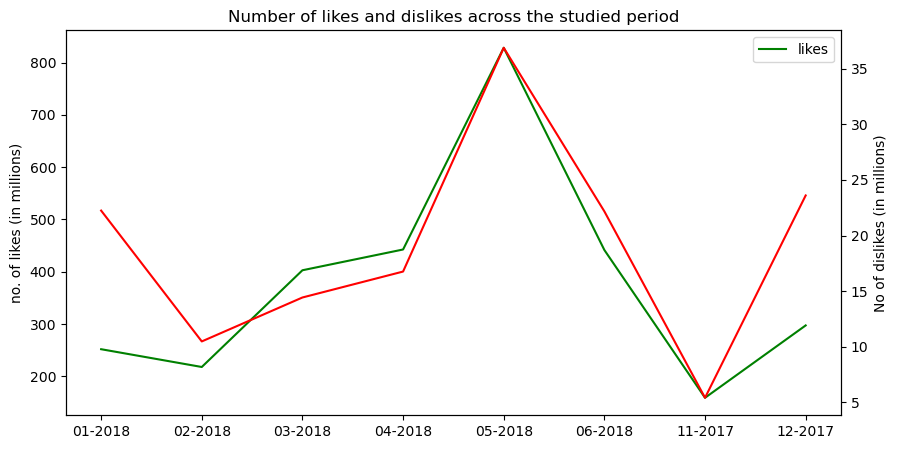

In [141]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.index, data.likes / 1000000, color = "green", label = "likes")
ax.set_ylabel("no. of likes (in millions)")
ax2 = ax.twinx()
ax2.plot(data.index, data.dislikes / 1000000, color = "red", label = "dislikes")
ax2.set_ylabel("No of dislikes (in millions)")
ax.set_title("Number of likes and dislikes across the studied period")
ax.legend()
plt.show()

### 5. Which channels have the highest average views per video?

Each video may have repeated values for different number of views, due to the fact that they entered and went out of the trending videos list. I will take the maximum number of views per each unique video. Then I will work out the average views number per channel.

In [75]:
# max number of views per unique video
videos = df[['channel_title', 'title', 'views']].sort_values('views', ascending = False)
# keep only the most viewed register for each unique combination of channel and title
videos = videos.drop_duplicates(['channel_title', 'title'])

,channel_title,title,views
34845,ChildishGambinoVEVO,Childish Gambino - This Is America (Official V...,225211923
5553,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127
31355,ArianaGrandeVevo,Ariana Grande - No Tears Left To Cry,148689896
31438,BeckyGVEVO,"Becky G, Natti Natasha - Sin Pijama (Official ...",139334502
37744,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920
...,...,...,...
255,90s Commercials,Huffy Metaloid Bicycle Commercial 1997,773
12992,Associated Press,"Raw: 3 South Carolina Deputies, 1 Officer Shot",748
12021,Palo Alto Online,Artwork Forge,745
986,GoDucksdotcom,Coach Taggart Monday Presser Ahead of Arizona,704


In [81]:
# check if there are channels with more than one videos that got into the trending list

videos["channel_title"].value_counts().sort_values(ascending = False)

channel_title
ESPN                                      84
TheEllenShow                              74
The Tonight Show Starring Jimmy Fallon    72
Jimmy Kimmel Live                         70
Netflix                                   58
                                          ..
Thomas Sebastian                           1
FaeryInLoveInc                             1
Renault Sport                              1
CMAVEVO                                    1
GoDucksdotcom                              1
Name: count, Length: 2207, dtype: int64

In [98]:
top_avg_views_by_channel = videos.groupby("channel_title").views.mean().sort_values(ascending=False)

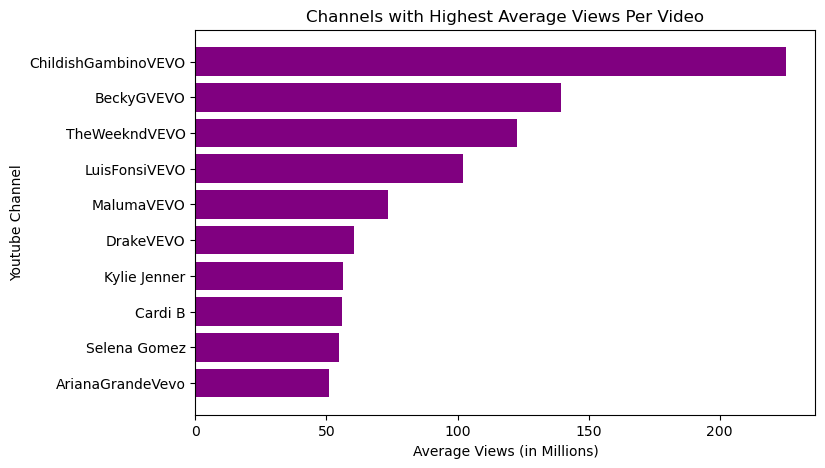

In [102]:
data = top_avg_views_by_channel.iloc[:10]
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(data.index, data.values / 1000000, color="purple")
ax.set_title("Channels with Highest Average Views Per Video")
ax.set_xlabel("Average Views (in Millions)")
ax.set_ylabel("Youtube Channel")
ax.invert_yaxis()
plt.show()

### 6.What is the average number of days a video remains on the trending list?

Difference between first and last trending_date

In [109]:
# Group by video_id and calculate the difference in days between first and last trending dates
video_trend_duration = df.groupby('video_id')['trending_date'].apply(lambda x: (x.max() - x.min()).days)

In [122]:
# Calculate the average trend duration
average_trend_duration = video_trend_duration.mean().round()

# Format the average trend duration
formatted_duration = "{:.2f} days".format(average_trend_duration)

print("Average number of days a video remains on the trending list:", formatted_duration)

Average number of days a video remains on the trending list: 6.00 days


### 7. Is there a relationship between the number of comments and the number of views?

Since each video, as I noted before, may have repeated values for different number of views, I will take the video with the maximum number of views per each unique video.

In [146]:
# max number of views per unique video
videos = df[['channel_title', 'title', 'views', 'comment_count']].sort_values('views', ascending = False)
# keep only the most viewed register for each unique combination of channel and title
videos = videos.drop_duplicates(['channel_title', 'title'])

Get the number of views and comments per video:

In [147]:
data = videos.set_index(['channel_title', 'title'])[['comment_count', 'views']]

In [148]:
data.head()

,,comment_count,views
channel_title,title,,
ChildishGambinoVEVO,Childish Gambino - This Is America (Official Video),517232,225211923
YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRewind,810698,149376127
ArianaGrandeVevo,Ariana Grande - No Tears Left To Cry,242039,148689896
BeckyGVEVO,"Becky G, Natti Natasha - Sin Pijama (Official Video)",83941,139334502
ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV,1228655,123010920


#### Linear regression
Followed this tutorial at [realpython.com](https://realpython.com)

In [ ]:
# if not installed, uncomment and run this command to install library
#!pip install scikit-learn

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
# x because this array must be two-dimensional, or more precisely, it must have one column and as many rows as necessary.
# That’s exactly what the argument (-1, 1) of .reshape() specifies.
x = np.array(data.views).reshape((-1, 1))
y = np.array(data.comment_count)
model = LinearRegression().fit(x, y)

Once the linear regression is done, I want to have the intercept (.intercept_) and slope (.coef_) values, as well as the determination coefficient 𝑅² (.score()).

In [155]:
intercept = model.intercept_
slope = model.coef_[0]
det_coef = model.score(x,y)

Results of the linear regresssion:

In [156]:
print(f'Linear regression: y = {slope.round(3)} · x + {intercept.round(3)}')
print(f'Determination coefficient (for goodness of linear regression) is: {det_coef.round(3)}')

Linear regression: y = 0.003 · x + 1042.207
Determination coefficient (for goodness of linear regression) is: 0.329


In [157]:
estimated_comment_count = np.array(data.views) * slope + intercept

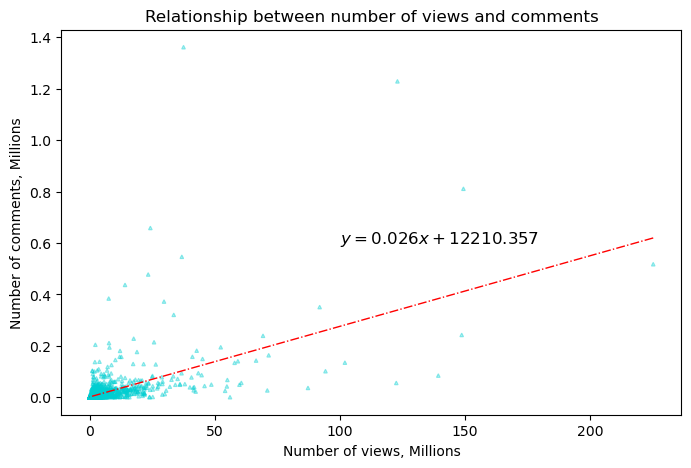

In [158]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter((data.views * 1E-6), (data.comment_count * 1E-6), s=5, alpha=0.5, edgecolor='darkturquoise', facecolor='none', marker='^')
ax.plot((data.views * 1E-6), (estimated_comment_count * 1E-6), lw=1, ls='dashdot', color='red')
ax.set_xlabel('Number of views, Millions')
ax.set_ylabel('Number of comments, Millions')
ax.set_title('Relationship between number of views and comments')
# add linear model equation to plot
plt.text(100, 0.6, r'$y = 0.026x + 12210.357$', fontsize=12)
plt.show()

### 8. Do videos with disabled comments or ratings tend to have more or fewer views?

In [142]:
# max number of views per unique video
videos = df[['channel_title', 'title', 'views', 'comments_disabled', 'ratings_disabled']].sort_values('views', ascending = False)
# keep only the most viewed register for each unique combination of channel and title
videos = videos.drop_duplicates(['channel_title', 'title'])

Get the number of views and comments per video:

In [143]:
data = videos.set_index(['channel_title', 'title'])[['comments_disabled', 'ratings_disabled', 'views']]
data_comments = data.groupby('comments_disabled').views.sum()
data_ratings = data.groupby('ratings_disabled').views.sum()

In [144]:
data_comments.index = ['Enabled', 'Disabled']
data_ratings.index = ['Enabled', 'Disabled']

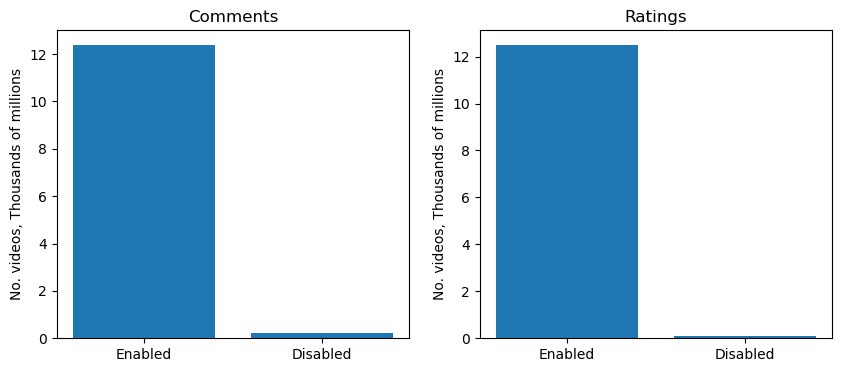

In [145]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].bar(data_comments.index, data_comments.values * 1E-9, label='Comments')
ax[0].set_title('Comments')
ax[0].set_ylabel('No. videos, Thousands of millions')
ax[1].bar(data_ratings.index, data_ratings.values * 1E-9)
ax[1].set_ylabel('No. videos, Thousands of millions')
ax[1].set_title('Ratings')
plt.show()